Lambda School Data Science

*Unit 1, Sprint 1, Module 2*

---

# Learning Objectives

- Student should be able to understand the purpose of feature engineering
- Student should be able to work with strings in pandas
- Student should be able to work with dates and times in pandas
- Student should be able to modify or create columns of a dataframe using the `.apply()` function

- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations - eg. .strip(), .split(), .replace() and list comprehensions
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series - lots more details about time using and not using Pandas
- [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)

#Pandas is not "Pythonic". 

What does Pythonic mean???

???

## Overview

Feature Engineering is the process of using a combination of domain knowledge, creativity, and the pre-existing columns of a dataset to create completely new columns.

 Machine Learning models try to detect patterns in the data and then associate those patterns with certain predictions. The hope is that by creating new columns on our dataset that we can expose our model to new patterns in the data so that it can make better and better predictions.

This is largely a matter of understanding how to work with individual columns of a dataframe with Pandas --which is what we'll be practicing today!

## Follow Along

Columns of a dataframe hold each hold a specific type of data. Lets inspect some of the common datatypes found in datasets and then we'll make a new feature on a dataset using pre-existing columns.

In [ ]:
#Import pandas


# Pandas Display Options:
pd.set_option('display.max_rows', ???)
pd.set_option('display.max_columns', ???)

### Let's explore feature engineering with the Ames Housing data.  Import the dataset and name it "house".

###1) Import the Ames Housing Data:

In [ ]:
house = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Housing/Ames%20Iowa%20Housing%20Data.csv')

###2) Let's explore some features of the dataset:

In [ ]:
#Print out the first five observations


In [ ]:
#Print out the last five observations


In [ ]:
#Get info on each variable



In [ ]:
#What if I just want the data type?



In [ ]:
#How much missing data is there in each variable?



In [ ]:
#How many missing observations are there in the entire dataset?



In [ ]:
#How could we access descriptive statistics for the numeric variables?



In [ ]:
#How could we access descriptive statistics for the categorical variables?



Let's look a little more closely at `BedroomAbvGr`

`BedroomAbvGr` which stands for "Bedrooms Above Ground." This is the number of non-basement bedrooms in the home.

For more information on specific column meanings view the [data dictionary](https://github.com/LambdaSchool/data-science-practice-datasets/blob/main/unit_1/Housing/ames_data_description.txt).

In [ ]:
# Look at a few rows of the `BedroomAbvGr` column.
# What is the data type?


What type of variable is BedroomAbvGr?  Is it categorical or quantitative?  etc.

?????

Now lets take a closer look at `LotFrontage`.

In [ ]:
# Look at a few rows of the `LotFrontage` column.


Hmmm, do the values above look like floats to you?

They all have .0 on them so technically they're being stored as floats, but *should* they be stored as floats?

Lets see what all of the possible values for this column are.

In [ ]:
#Possible values of lot frontage

Looks to me like the `LotFrontage` column originally held integer values but was cast to a `float` meaning that each original integer values was converted to its corresponding float representation. 

Any guesses as to why that would have happened?


HINT: Does every house have a lot frontage?

In [ ]:
#?????

`NaN` stands stands for "Not a Number" and is the default missing value indicator with Pandas. This means there were cells in this column that didn't have a LotFrontage value recorded for those homes. 

This is where domain knowledge starts to come in. Think about the context we're working with here: houses. What might a null or blank cell representing "Linear feet of street connected to property" mean in the context of a housing dataset?

Ok, so maybe it makes sense to have some NaNs in this column. What is the datatype of a NaN value?

Perhaps some of this data is truly missing or unrecorded data, but sometimes `NaNs` are more likely to indicate something that was "NA" or "Not Applicable" to a particular observation. There could be multiple reasons why there was no value recorded for a particular feature.

Remember - Pandas tries to maintain a single datatype for all values in a column, and therefore...

In [ ]:
#import numpy



# What is the datatype of NaN?



The datatype of a NaN is float!  This means that if we have a column of integer values, but the column has even a single `NaN` that column will not be treated with the integer datatype but all of the integers will be converted to floats in order to try and preserve the same datatype throughout the entire column.

You can see already how understanding column datatypes is crucial to understanding how Pandas help us manage our data.

# [Objective 01](#feature-engineering) - Feature Engineering



### Making new Features

Lets slim down the dataset and consider just a few specific columns:

- `TotalBsmtSF`
- `1stFlrSF`
- `2ndFlrSF`
- `SalePrice1`


In [ ]:
# I can make a smaller dataframe with a few specific column headers
# by passing a list of column headers inside of the square brackets
# get a single column



In [ ]:
# Get more than one column, then pass in a list of column headers


In [ ]:
# I can make a smaller dataframe with a few specific column headers
# by passing a list of column headers inside of the square brackets

#In the following example we are copying a set to another set using = operator. 
#The problem with this method is that if any of the set (old or new) is modified, 
#the changes will reflect in both the sets. If you do not want this kind of behavior 
#and only want the set where you are making changes to be changed then use copy() method



This is the best tutorial I've seen about the difference between assignment, a shallow copy and a deep copy: https://medium.com/better-programming/assignment-vs-shallow-copy-vs-deep-copy-in-python-246ea4d36b3c


In [ ]:
#Look at the data types


### Creating a new column by doing arithmetic on other columns

In [ ]:
# Lets add up all of the square footage to get a single square footage 
# column for the entire dataset



In [ ]:
# Lets make a nother new column that is 'PricePerSqFt' by
# dividing the price by the square footage



###Why might you want to have the total square footage or price per square foot variables?

?????

###We can also use if-then statements to create new variables.  

Say we want to categorize houses as having a high price per square foot (greater than or equal to 80 dollars per square foot) or a low price per square foot (less than 80 dollars per square foot).

In [ ]:
#The format is DF.loc[DF['COLUMN'] logical expression, 'NEW VARIABLE NAME' ] assignment



Why might we want to have categories for high and low cost per square foot?



?????

### Let's include "and" and "or" conditions in the if-then statements.

We can identify high price per square foot houses with basements.

In [ ]:
#First, is no basement square footage respresented as NaN or as 0sqft?



In [ ]:
#No missing data so we can assume if basement sqft = 0 then there is no basement.





## Challenge

I hope you can see how we have used existing columns to create a new column on a dataset that say something new about our unit of observation. This is what making new features (columns) on a dataset is all about and why it's so essential to data science --particularly predictive modeling "Machine Learning." 

We'll spend the rest of the lecture and assignment today trying to get as good as we can at manipulating (cleaning) and creating new columns on datasets.

# [Objective 02](#work-with-strings) - Work with Strings with Pandas

# [Objective 03](#pandas-apply) - Modify and Create Columns using `.apply()`



## Overview

So far we have worked with numeric datatypes (ints and floats) but we haven't worked with any columns containing string values. We can't simply use arithmetic to manipulate string values, so we'll need to learn some more techniques in order to work with this datatype.

## Follow Along

We're going to import a new dataset here to work with. This dataset is from LendingClub and holds information about loans issued in Q4 of 2018. This dataset is a bit messy so it will give us plenty of opportunities to clean up existing columns as well as create new ones.

The `!wget` shell command being used here does exactly the same thing that your browser does when you type a URL in the address. It makes a request or "gets" the file at that address. However, in our case the file isn't a webpage, it's a compressed CSV file. 

Try copying and pasting the URL from below into your browser, did it start an automatic download? Any URLs like this that start automatic downloads when navigated to can be used along with the `!wget` command to bring files directly into your notebook's memory.

### Load a new dataset

In [ ]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

We need to use the `!unzip` command to extract the csv from the zipped folder.

In [ ]:
!unzip LoanStats_2018Q4.csv.zip

We can also use bash/shell commands to look at the raw file using the `!head` and `!tail` commands

In [ ]:
!head LoanStats_2018Q4.csv

In [ ]:
!tail LoanStats_2018Q4.csv

###As we look at the raw file itself, do you see anything that might cause us trouble as we read in the CSV file to a dataframe?

???

In [ ]:
# Read in the CSV



In [ ]:
# We can also fix the header problem by using the 'skiprows' parameter



In [ ]:
# Skip the footer as well.


A quick note about missing data...  Why might there be so much missing data for membrID, etc.

In [ ]:
#check for missing data in loans


In [ ]:
#drop columns where everything is missing


In [ ]:
#did it work?


### Clean up the `int_rate` column

When we're preparing a dataset for a machine learning model we typically don't want to leave any string values in our dataset --because it's hard to do math on words. 

Specifically, we have a column that is representing a numeric value, but currently doesn't have a numeric datatype. Lets look at the first 10 values of the `int_rate` column:

In [ ]:
# Look at the first 10 values of the int_rate column


In [ ]:
# We can use .str.strip to remove both the leading space and the % sign and cast the value to a float rather than a string.


In [ ]:
#Remove the white space




In [ ]:
#Remove both by using both functions



In [ ]:
#Finally, we need to cast our value to a float so we can do calculations on it


#Let's talk about another way to approach this problem by building a function and using .apply()

In [ ]:
# Lets start with just fixing a single string.
# If we can fix one, we can usually fix all of them



In [ ]:
#Remove extra white space



In [ ]:
#Doesn't work if there isn't any extra white space to remove



In [ ]:
#Doesn't work to try to apply the .strip function to an entire column all at once (without the .str).
#The function has to be applied to a text string.




In [ ]:
#You can "chain" two strip functions to remove both the spaces and the % sign



In [ ]:
# "Cast" the string value to a float
# "cast" -> Change something's data type
# This is the line of code that we're after! ->


In [ ]:
#check the variable type

### Write a function to make our solution reusable!

In [ ]:
#Review what we're working with one more time


We want to write a function that will look in every cell of int_rate, take out the white space and the % and convert the result into a float.

Every function has several standard parts:

* def statement
* name
* parameter name(s)
* body
* a return statement
* a return value

Here's an example of a function that the raduius of a sphere and calculates the volume.

It would be a pain to have to write this code over and over again if we needed to do this calculation a lot, so it's nice to have it written as a re-usable function. 

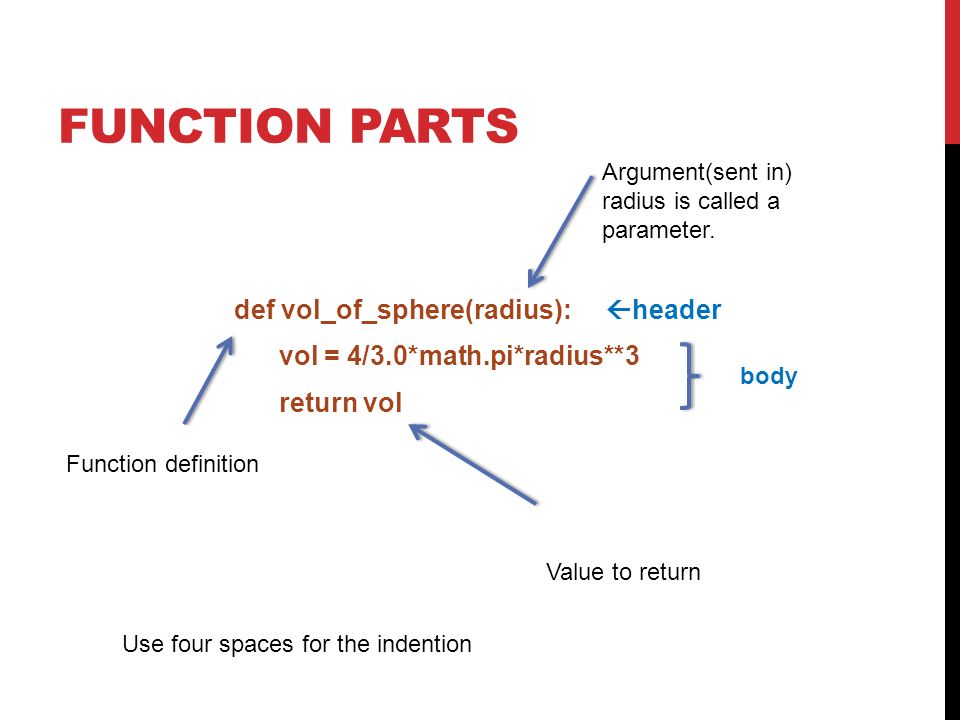

In [ ]:
# Here is a function that will take a single string, strip off the space and %
# And return the value as a float

def int_rate_to_float(string):
  return float(string.strip().strip('%'))

* def = _____________
* return = ____________
* int_rate_to_float = ________________
* string = _______________
* float(string.strip().strip('%')) = __________________



In [ ]:
# Test out our function by calling it on int_rate, the string we created earlier.



In [ ]:
# is the data type correct?


The the problem is that - to use this function - we'd have to feed in every interest rate one by one.  Not pracitcal.  

Fortunately we can use the .apply() function built to into Python, which will apply the function to every row of a variable.

### Apply to every row using .apply

In [ ]:
#Apply to every row

In [ ]:
# pass in *only* the name of the function, don't call it. 
# This works because we know the function works on every item in the column
# so I can simply "apply" it to the entire column



In [ ]:

# What type of data is held in our new column?

# Look at the datatypes of the last 5 columns



## Challenge

We can create a new column with our cleaned values or overwrite the original, whatever we think best suits our needs. On your assignment you will take the same approach in trying to methodically build up the complexity of your code until you have a few lines that will work for any cell in a column. At that point you'll contain all of that functionality in a reusable function block and then use the `.apply()` function to... well... apply those changes to an entire column.

# [Objective](#dates-and-times) Work with Dates and Times with Pandas

## Overview

Pandas has its own datatype datatype that makes it extremely convenient to convert strings that are in standard date formates to datetime objects and then use those datetime objects to either create new features on a dataframe or work with the dataset in a timeseries fashion. 

This section will demonstrate how to take a column of date strings, convert it to a datetime object and then use the datetime formatting `.dt` to access specific parts of the date (year, month, day) to generate useful columns on a dataframe.

## Follow Along

### Work with Dates 

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

Many of the most useful date columns in this dataset have the suffix `_d` to indicate that they correspond to dates.

We'll use a list comprehension to print them out

###What is a list comprehension?


List comprehension is an elegant way to define and create lists based on existing lists.



A list comprehension has the form: [expression for item in list]

In [ ]:
#List comprehension tht returns a list of columns from loans where the column
#name ends with _d

[col for col in loans if col.endswith('_d')]

* Expression = col (first time, before for)
* Item = col (second time, after for)
* List = loans if col.endswith('_d')

Lets look at the string format of the `issue_d` column

In [ ]:
#head of issue_d column

Because this string format %m-%y is a common datetime format, we can just let Pandas detect this format and translate it to the appropriate datetime object.

In [ ]:
#print fist observation of issue_d column


Now we can see that the `issue_d` column has been changed to hold `datetime` objects.

Lets look at one of the cells specifically to see what a datetime object looks like:

In [ ]:
#Covert to datetime

You can see how the month and year have been indicated by the strings that were contained in the column previously, and that the rest of the values have been inferred.

In [ ]:
#covert to datetime and print head


We can use the `.dt` accessor to now grab specific parts of the datetime object. Lets grab just the year from the all of the cells in the `issue_d` column

In [ ]:
#Use .dt to grab year

Now the month.

In [ ]:
#Use dt grab month

It's just that easy! Now, instead of printing them out, lets add these year and month values as new columns on our dataframe. Again, you'll have to scroll all the way over to the right in the table to see the new columns.

In [ ]:
#Save month and year

Because all of these dates come from Q4 of 2018, the `issue_d` column isn't all that interesting. Lets look at the `earliest_cr_line` column, which is also a string, but that could be converted to datetime format.

We're going to create a new column called `days_from_earliest_credit_to_issue`

It's a long column header, but think about how valuable this piece of information could be. This number will essentially indicate the length of a person's credit history and if that is correlated with repayment or other factors could be a valuable predictor!

In [ ]:
#Determine earliest credit date

In [ ]:
#Determine length of longest credit line.

In [ ]:
#Determine length of credit line in days and years

What we're about to do is so cool! Pandas' datetime format is so smart that we can simply use the subtraction operator `-` in order to calculate the amount of time between two dates. 

Think about everything that's going on under the hood in order to give us such straightforward syntax! Handling months of different lengths, leap years, etc. Pandas datetime objects are seriously powerful!

In [ ]:
#Longest credit line in years

What's oldest credit history that was involved in Q4 2018? 

In [ ]:
#Longest credit history in days.